In [112]:
import matplotlib.pyplot as plt 
import numpy as np 


#Nota, personaje avanza de 2 en 2, ya que se debe reservar un espacio para las paredes
def drawQuoridorBoard(nop, walls):
    #n = len(board)
    bo = np.zeros((9, 9, 3)) #(9, 9) = 9x9 board size
    bo += 0.8 #opactiy of black spaces
    bo[ ::2, ::2] = 1
    bo[1::2, 1::2] = 1

    fig, ax = plt.subplots()
    ax.imshow(bo, interpolation='nearest')

    #add players:
    ax.text(0, 4, u'\u265F', size=30, ha='center', va='center')
    ax.text(8, 4, u'\u265F', size=30, ha='center', va='center')
    ax.text(4, 0, u'\u265F', size=30, ha='center', va='center')
    ax.text(4, 8, u'\u265F', size=30, ha='center', va='center')

    #add walls
    #horizontal wall
    ax.text(-1, 2, u'\u268A', size=30, ha='center', va='center')
    ax.text(-1, 3, u'\u268A', size=30, ha='center', va='center')
    ax.text(-1, 4, u'\u268A', size=30, ha='center', va='center')
    ax.text(-1, 5, u'\u268A', size=30, ha='center', va='center')
    ax.text(-1, 6, u'\u268A', size=30, ha='center', va='center')

    ax.text(9, 2, u'\u268A', size=30, ha='center', va='center')
    ax.text(9, 3, u'\u268A', size=30, ha='center', va='center')
    ax.text(9, 4, u'\u268A', size=30, ha='center', va='center')
    ax.text(9, 5, u'\u268A', size=30, ha='center', va='center')
    ax.text(9, 6, u'\u268A', size=30, ha='center', va='center')

    #vertical wall \u2759
    ax.text(2, 9, u'\u2759', size=20, ha='center', va='center')
    ax.text(3, 9, u'\u2759', size=20, ha='center', va='center')
    ax.text(4, 9, u'\u2759', size=20, ha='center', va='center')
    ax.text(5, 9, u'\u2759', size=20, ha='center', va='center')
    ax.text(6, 9, u'\u2759', size=20, ha='center', va='center')

    ax.text(2, -1, u'\u2759', size=20, ha='center', va='center')
    ax.text(3, -1, u'\u2759', size=20, ha='center', va='center')
    ax.text(4, -1, u'\u2759', size=20, ha='center', va='center')
    ax.text(5, -1, u'\u2759', size=20, ha='center', va='center')
    ax.text(6, -1, u'\u2759', size=20, ha='center', va='center')

    ax.set(xticks=[], yticks=[])
    ax.axis('image')

    plt.show()

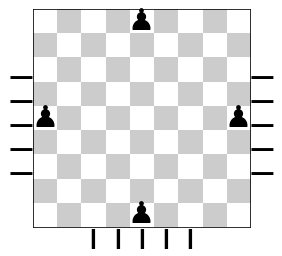

In [113]:
nop = 2 #number of players

drawQuoridorBoard(nop, walls)